# Road Safety in Ethiopia

## Organization
I worked as a Data Scientist, giving weekly analytical insights in 1-hour meetings to the "Road Safety in Ethiopia" team with 
>Rob Marty (Research Analyst), 

>Théophile Bougna (Economist), 

>Alice Duhaut (Consultant). 

- While throughout my internship I usually reported to Rob every week, I eventually presented the finalized project to the entire team.
- I ended up making use of a lot of the skills acquired in some of BGSE's modules such as Computational Machine Learning I, Data Warehousing & Business Intelligence, etc. <br>
- I used Python as my main coding language while I had to read and adapt R code at times as well. The packages I used most extensively were Pandas, sci-kit learn and statsmodels. <br>
- I coded mainly in Jupyter Notebooks and sometimes with Pycharm. <br>
- There were many situations where, in order to deliver a valuable analysis, I had to do additional research such as what predictive models to use, how to combine oversampling with cross-validation correctly, how to store data efficiently and what others did in similar analyses.

## **Objective & Data**


The underlying idea of this project is to explain and predict car crashes along the highway (Ethiopian Expressway) between the two Ethiopian cities Addis Ababa and Adama. To do this we used different types of data from several different sources:
- ETRE (Ethiopian Toll Roads Enterprise) Crash dataset
> ~700 Crashes with several driver/vehicle/accident/injury-related characteristics such as time, location,             vehicle type, license year, etc.
- ETRE Traffic dataset
> Entry and Exit time and location (km along the Expressway) of every vehicle between the years 2015-2017
> Vehicle type, direction, total weight of the car, etc.
> 5.3 Mio. observations
- Precipitation Data
> Daily amount of rainfall in cm

**Result: A dataset with kilometer and hour granularity**

## Feature Engineering


**By kilometer segment and hour:**
- Traffic
> The number of cars that are located at each hour and kilometer segment based on entry and exit time and location along expressway
- Vehicle type proportions
> 7 different vehicle types (truck, motorcycle, car, ...)
> The proportion of these vehicles on each hour-kilometer segment
- Average vehicle weight
- Average speed
- Several interactions: speed_x_rain, speed with low traffic, etc.

**By kilometer segment only:**
   - Number of crashes in earlier years
   - Road curvature (was engineered before my entry date)
    
**By hour/day only:**
   - Weekend dummy
   - Rush-Hour dummy
   - Midnight dummy
    
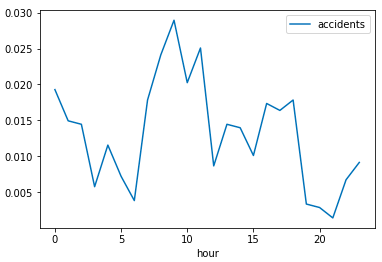
   - Interaction with rain and different segments (6 segments categorized based on entry & exit point)
        > To see where rain has a more significant effect

## **Explaining Accidents**

In order to explain the causes of accidents I took a dummy of accident vs. no accident as the dependent variable and ran the following different regressions:


- OLS
- Several different fixed effects regressions
- Logistic regression.

To make sure none of the features are too highly correlated with each other I kept track of this heatmap:
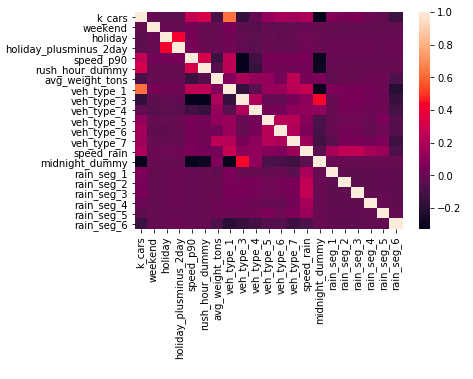

**OLS**
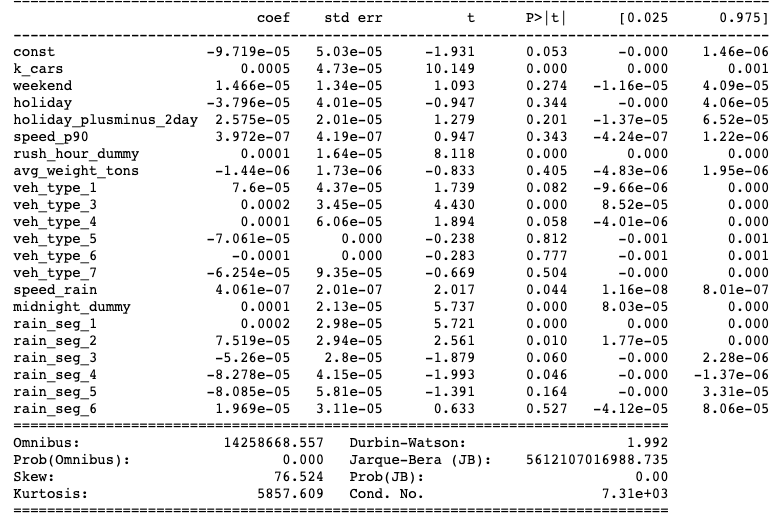

**Year fixed effects**
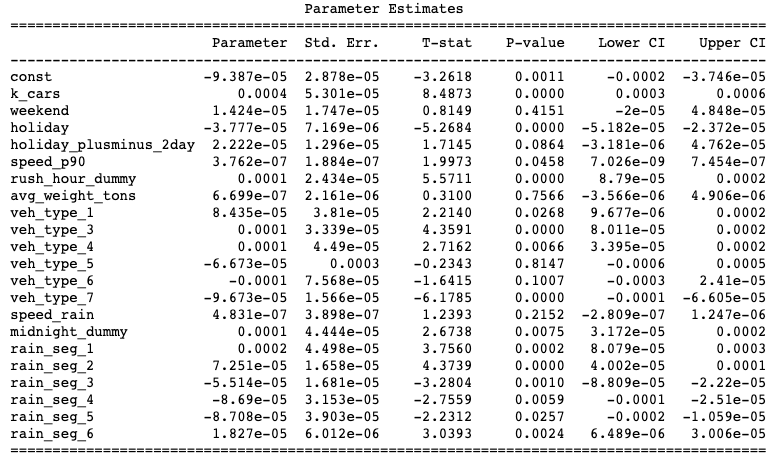

**Year month fixed effects**
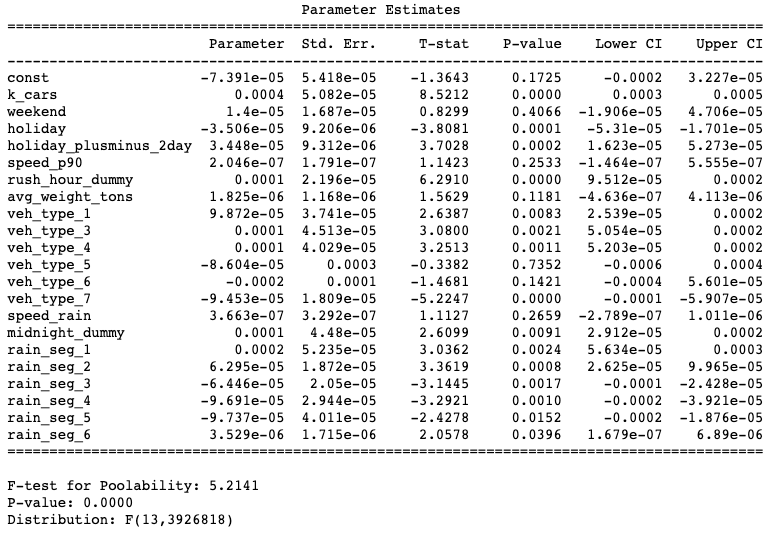

**Month fixed effects**
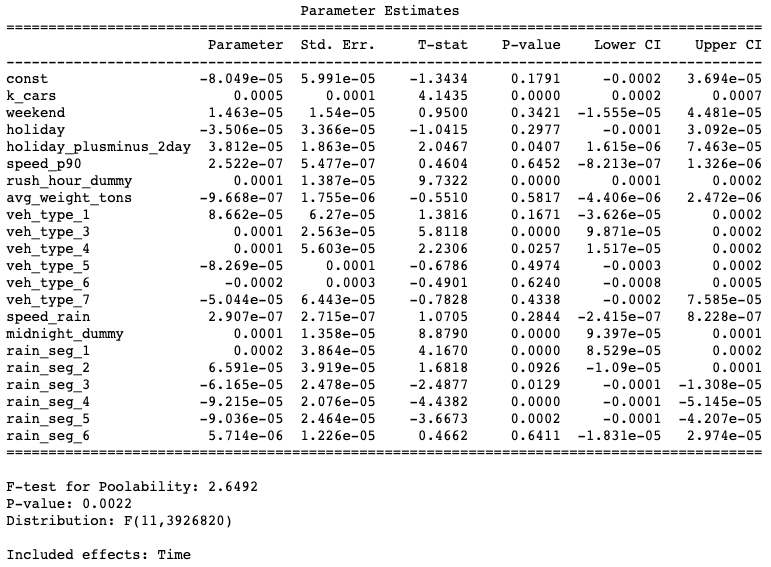

**Segment fixed effects**
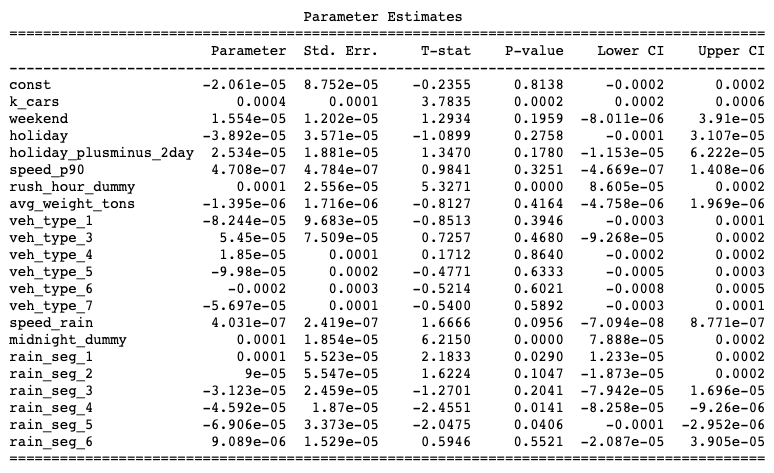

**Year month day fixed effects**

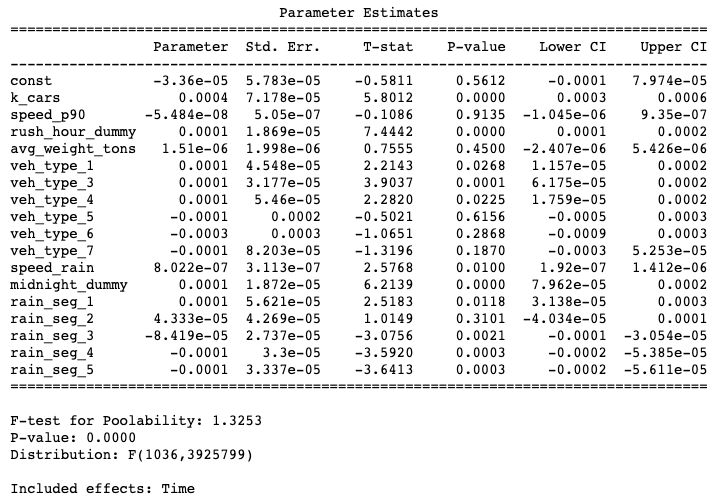

**Segment direction fixed effects**
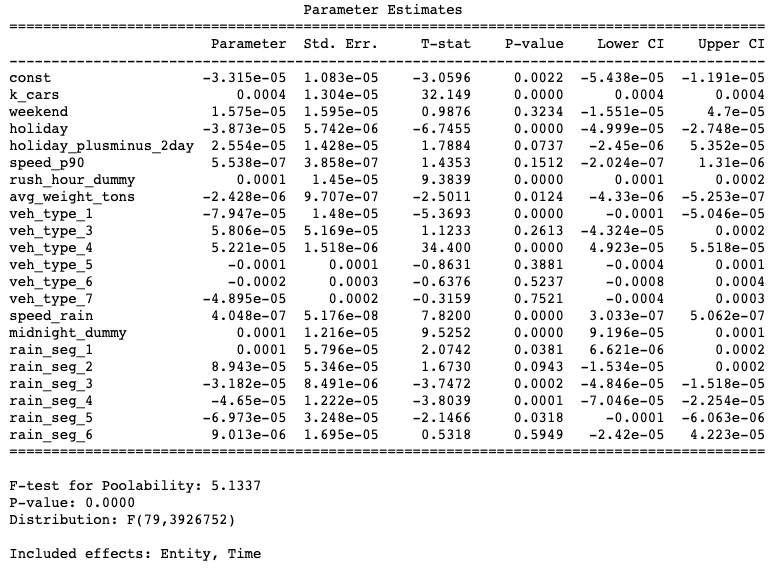

**Logistic Regression**
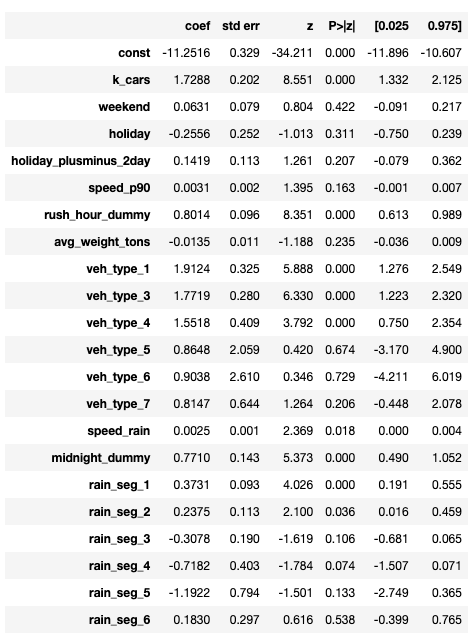

**Key takeaways:**
- Generated traffic variable highly significant in every regression! (Positive coefficient).

- Rush hour & midnight dummy highly significant in every regression with positive coefficient.

- Vehicle type 1, 3 & 4 significant on the 5% level on almost every regression with positive coefficient.

- Rain causes accidents in the kilometer segments closest to Addis Ababa (1 & 2) whereas in the later segments it seems to prevent them (negative coefficient!).

- Speed becomes significant when interacted with rain.

## Predicting Accidents

- **Target**: Binary, Accident vs. No Accident



- **Time based data split**:
    - **Train**: March 2015 - June 2017
    - **Test**: July 2017 - December 2017
    

- Models used:

>    - **OLS** as baseline: With and without regularization (Lasso & Ridge)
>    - Tree-based models: **Random Forest**, **XGBoost**, **LightGBM**
>    - Other models: **Logistic regression** (Lasso, Ridge and without regularization)
    

- Evaluation metric: **ROC-AUC score**

- Treating Class imbalance:
> - Randomly over-sampling minority class observations (accidents)
    
- Grid Search over different hyperparameters of the models:
> - Number of estimators/... of tree models
> - Penalization parameter of OLS/Logit

**OLS**

- Best one: Ridge with Roc AUC score of 0.70, without penalization more or less the same.

**Logistic Regression**

- Roc AUC score: 0.71 with Ridge regression (Marginally less without penalization)

**Random Forest**
- Roc AUC Score: 0.71


- Feature importance:
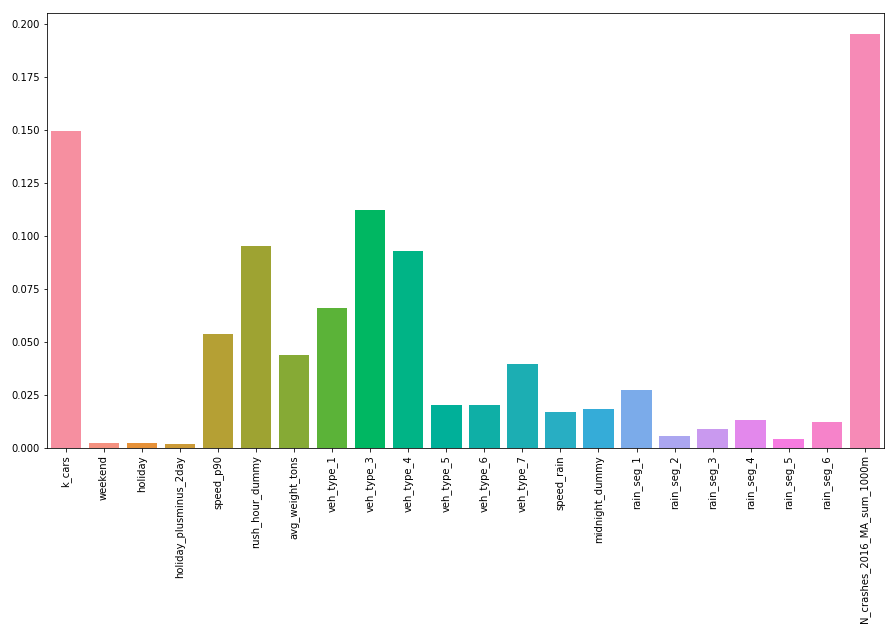

**XGBoost**

- Roc AUC score: 0.73


- Feature importance:
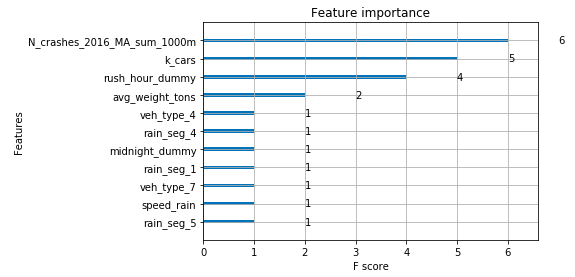

**LightGBM**

- Roc AUC score: 0.72

**In Conclusion:**
All the used models are doing similarly well, with XGBoost being the best one, yielding an out of sample roc auc score of 0.73.
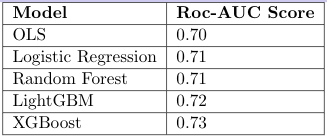

## How did others do?
**Article 1**
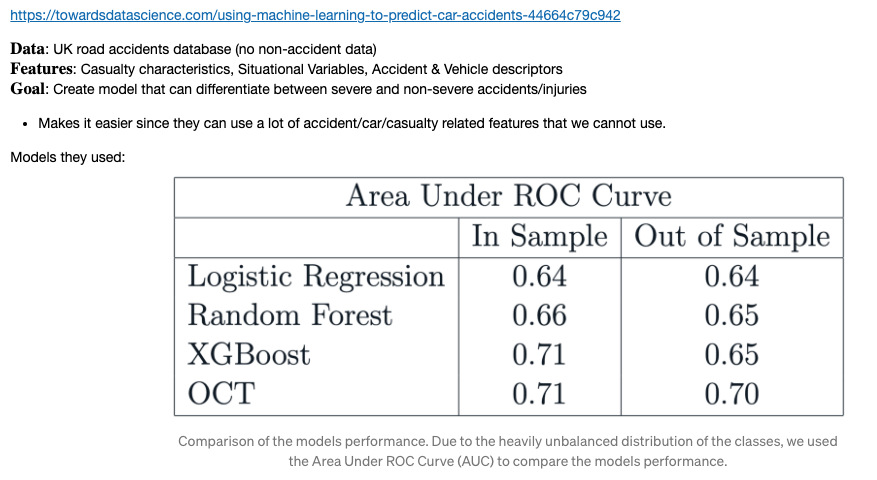

- They use 3 out of the 4 models we are using

- They are also using ROC AUC score as evaluation metric for the same reasons we are using it: class imbalance
 
- Their out of sample score is below ours for every model

**Paper 2**

https://www.researchgate.net/publication/332465567_A_comparative_study_on_machine_learning_based_algorithms_for_prediction_of_motorcycle_crash_severity



$\textbf{Data}$: National Road Traffic Crash Database at the Building and Road Research Institute (BRRI) in Ghana.<br>
$\textbf{Goal}$: Predicting 4 different categories of motorcycle accident severity

- Again: $\textbf{No non-accident data}$, so plenty of additional data they can use to differentiate between $\textbf{different types of accidents}$ rather than to predict accident vs. no accident.

They used:
- Decision TreeClassifier
- Random Forest
- K-Nearest Neighbour Algorithm

These machine learning algorithms were validated using 10-fold cross-validation. 

These models were compared to multinomial logit model (MNLM) as baseline which they clearly outperformed.
Best one: RF
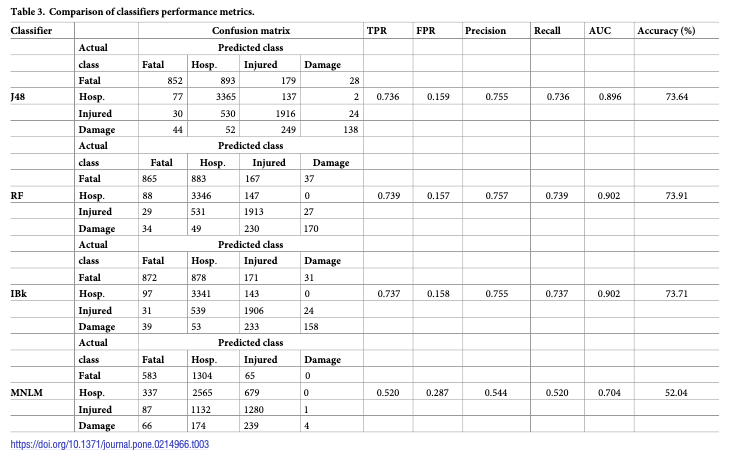
- Their ROC-AUC score is very high ($0.9$) but they are using $10$-fold cross-validation, and not a time-based out-of-sample split, which gives them an additional advantage.

**Article 3**
https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57

- Closest to what we are doing
- Predicting accidents vs non-accidents, on an hour-segment level
- More data: 500000 car accident records (we have 670).
- Traffic and accidents data from Utah: More complete data
- Their features:
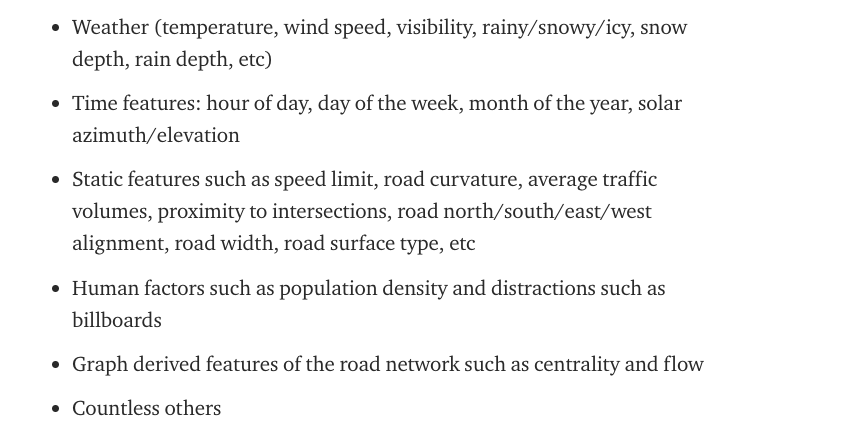

 They use XGBoost and Roc-AUC scores as well and get the following scores:
 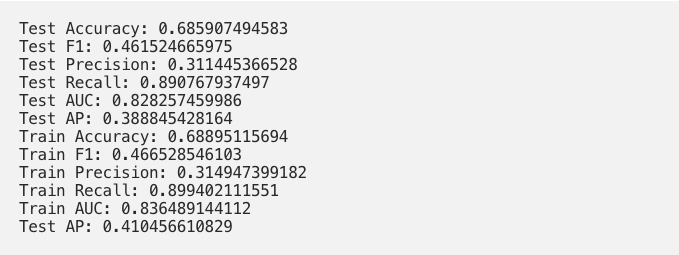

The last article suggests we could, with better data (i.e. more potential to generate useful features) and more data (more accidents) improve our prediction accuracy by another 10%. Since both of these hypotheticals are to a large extent not on the table, their prediction scores can be regarded as an upper bound to how good we can still get.

## **Additional Information**


**Background on Roc-AUC scores:**

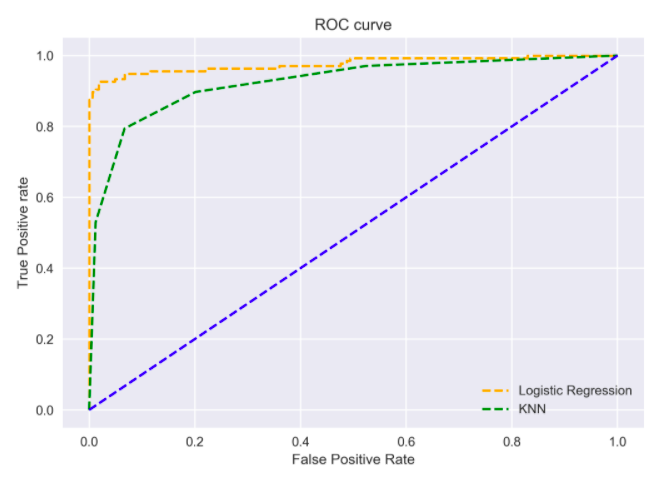

- Roc AUC score is the area under the curve above. Specifically, it is where on the map we are in terms of the **True Positive rate** and the **False Positive rate** for different probability prediction threshholds.


- A perfect classifier would therefore yield a Roc AUC score of 1 whereas with a random classifier one predicts with a score of around 0.5 (e.g. toin coss).

Note:
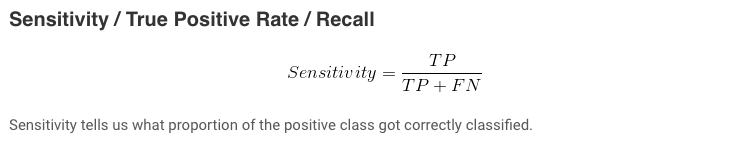

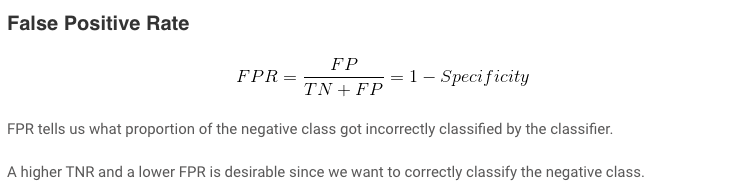

Source: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

**Background on Feature importance plots**

Gini importance (or mean decrease impurity):
> Average over how helpful a particular feature is over all the trees where it is used to separate accidents from non-accidents.
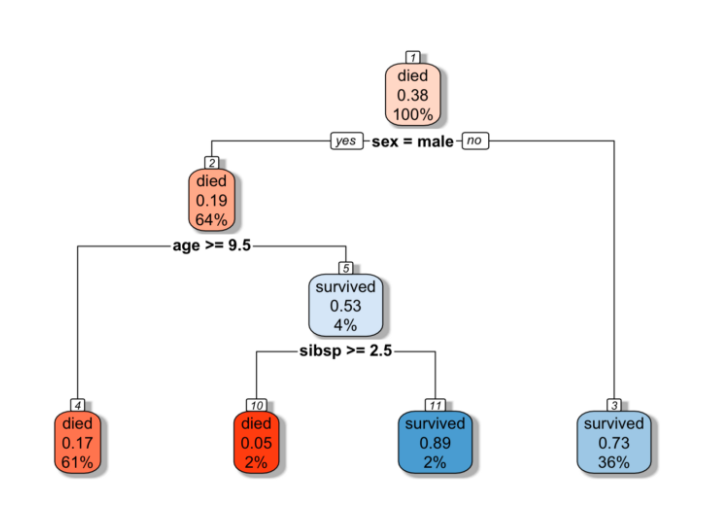
source: https://mljar.com/blog/visualize-tree-from-random-forest/